In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('IRIS.csv')
df = pd.DataFrame(data)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
#As we need to categorize the species column, we will use the factorize method to categorize the species column
df['species'], categories= pd.factorize(df['species'])
df
#species 0,1,2 are the categories in setosa, versicolor and virginica respectively

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [16]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


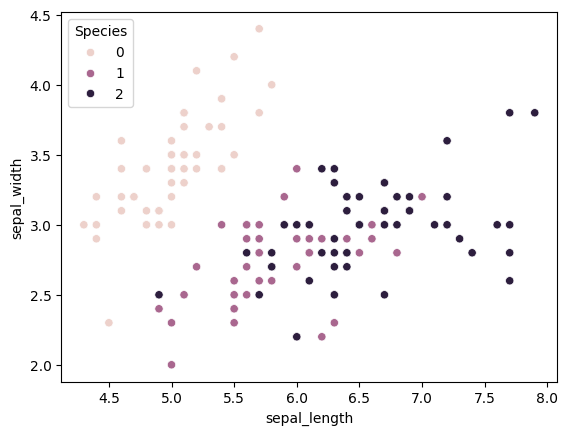

In [28]:
#visualizing with 2d according to sepal length and sepal width
scatterplot = sns.scatterplot(x='sepal_length', 
                              y='sepal_width', 
                              hue='species', data=df)
plt.legend(title='Species', loc='upper left')

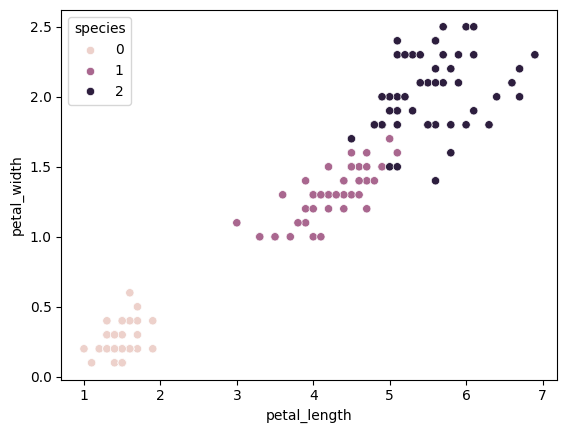

In [22]:
#visualizing with 2d according to petal length and petal width
scatterplot = sns.scatterplot(x='petal_length',
                              y='petal_width', 
                              hue='species', data=df)

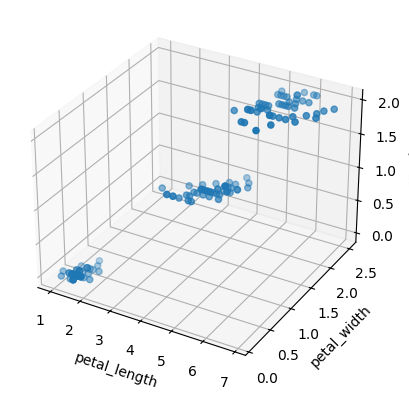

In [20]:
#visualizing the data in 3d plot petal length and petal width
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length, df.petal_width, df.species)

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')

plt.show()

To develop model that can classify Iris flowers into species based on their sepal and petal measurements

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_predict=kmeans.fit_predict(df[['petal_length', 'petal_width']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
df['cluster']=y_predict
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,0
96,5.7,2.9,4.2,1.3,1,0
97,6.2,2.9,4.3,1.3,1,0
98,5.1,2.5,3.0,1.1,1,0


Accuracy measure

In [43]:
#the confusion matrix
from sklearn.metrics import confusion_matrix as cm
c_matrix= cm(df.species, df.cluster)
c_matrix


array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

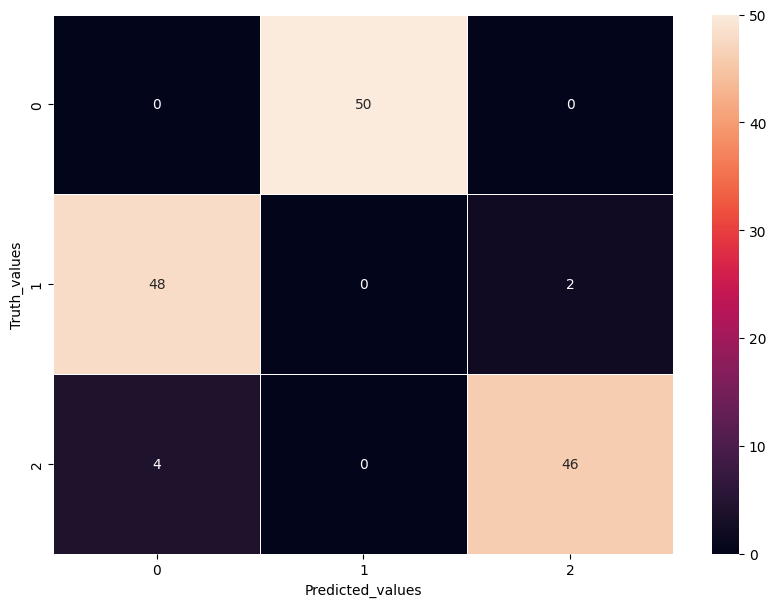

In [52]:
#visualizing the confusion matrix with heat map
plt.figure(figsize=(10,7))
sns.heatmap(c_matrix, annot=True,
            linecolor='white', linewidth=0.4)
plt.xlabel('Predicted_values')
plt.ylabel('Truth_values')
plt.show()
